###Mini project for the SRIP 2024 project "Develop SpiroMask end-to-end"

In [ ]:
#Library for audio analysis
!pip install pydub

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, lfilter
from pydub import AudioSegment
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
# Load the M4A files
audio_path1 = "deep_breathe_earphone.m4a"
deep_breathe_earphone = AudioSegment.from_file(audio_path1, format="m4a")

audio_path2 = "normal_breathing_earphone.m4a"
normal_breathing_earphone = AudioSegment.from_file(audio_path2, format="m4a")

audio_path3 = "deep_breathe_mic.m4a"
deep_breathe_mic = AudioSegment.from_file(audio_path3, format="m4a")

audio_path4 = "normal_breathing_mic.m4a"
normal_breathing_mic = AudioSegment.from_file(audio_path4, format="m4a")

In [ ]:
file_name = [deep_breathe_earphone, normal_breathing_earphone, deep_breathe_mic, normal_breathing_mic]
file_name_str = ["deep_breathe_earphone", "normal_breathing_earphone", "deep_breathe_mic", "normal_breathing_mic"]
print_lst = ["deep breathing audio recorded using earphone mic", "normal breathing audio recorded using earphone mic", "deep breathing audio recorded using boya mic",
             "normal breathing audio recorded using boya mic"]

for i in range(4):
  print(f"Length of {print_lst[i]} = {len(file_name[i])/1000} seconds")

Length of deep breathing audio recorded using earphone mic = 20.852 seconds
Length of normal breathing audio recorded using earphone mic = 20.155 seconds
Length of deep breathing audio recorded using boya mic = 20.294 seconds
Length of normal breathing audio recorded using boya mic = 20.248 seconds


Audio was recorded four times, two each for deep breathing and normal breathing (also called tidal breathing). Two different kinds of microphones were used just to understand the ......

In [ ]:
#Converting M4A files to .wav for easier access
for i in range(len(file_name_str)):
  output_path = file_name_str[i] + ".wav"
  file_name[i].export(output_path, format="wav")

In [ ]:
#Import the .wav audios

f_deep_earphone = file_name_str[0] + ".wav"
s_deep_earphone, a_deep_earphone = wavfile.read(f_deep_earphone)
print(f"Sampling Rate for {print_lst[0]}:",s_deep_earphone)
print(f"Audio Shape for {print_lst[0]}:",np.shape(a_deep_earphone))
print("*"*25)

f_normal_breathing_earphone = file_name_str[1] + ".wav"
s_normal_breathing_earphone, a_normal_breathing_earphone = wavfile.read(f_normal_breathing_earphone)
print(f"Sampling Rate for {print_lst[1]}:",s_normal_breathing_earphone)
print(f"Audio Shape for {print_lst[1]}:",np.shape(a_normal_breathing_earphone))
print("*"*25)

f_deep_mic = file_name_str[2] + ".wav"
s_deep_mic, a_deep_mic = wavfile.read(f_deep_mic)
print(f"Sampling Rate for {print_lst[2]}:",s_deep_mic)
print(f"Audio Shape for {print_lst[2]}:",np.shape(a_deep_mic))
print("*"*25)

f_normal_breathing_mic = file_name_str[3] + ".wav"
s_normal_breathing_mic, a_normal_breathing_mic = wavfile.read(f_normal_breathing_mic)
print(f"Sampling Rate for {print_lst[3]}:",s_normal_breathing_mic)
print(f"Audio Shape for {print_lst[3]}:",np.shape(a_normal_breathing_mic))
print("*"*25)

Sampling Rate for deep breathing audio recorded using earphone mic: 44100
Audio Shape for deep breathing audio recorded using earphone mic: (919552, 2)
*************************
Sampling Rate for normal breathing audio recorded using earphone mic: 44100
Audio Shape for normal breathing audio recorded using earphone mic: (888832, 2)
*************************
Sampling Rate for deep breathing audio recorded using boya mic: 44100
Audio Shape for deep breathing audio recorded using boya mic: (894976, 2)
*************************
Sampling Rate for normal breathing audio recorded using boya mic: 44100
Audio Shape for normal breathing audio recorded using boya mic: (892928, 2)
*************************


The sampling rate is $44.1 \text{kHz}$ for all audio recordings.

Plot all the waveform as subplots to get a better sense of what's going on for all the later steps

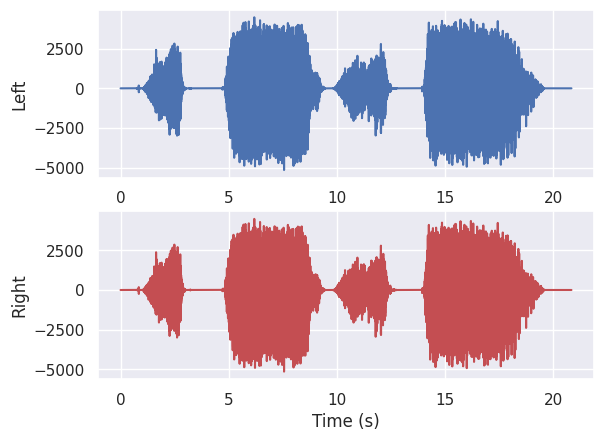

In [ ]:
#number of samples
na = a.shape[0]
#audio time duration
la = na / s

#plot signal versus time
t = np.linspace(0,la,na)
plt.subplot(2,1,1)
plt.plot(t,a[:,0],'b-')
plt.ylabel('Left')
plt.subplot(2,1,2)
plt.plot(t,a[:,1],'r-')
plt.ylabel('Right')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
#Make audio single channel and export as .wav for easier access
sound = AudioSegment.from_wav(f)
sound = sound.set_channels(1)
fm = f[:-4]+'_mono.wav'
sound.export(fm,format="wav")

<_io.BufferedRandom name='deep_breathe_earphone_mono.wav'>

In [ ]:
#Loading wav file
s,a = wavfile.read(fm)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 44100
Audio Shape: (919552,)


<ipython-input-10-f129bcdecba2>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


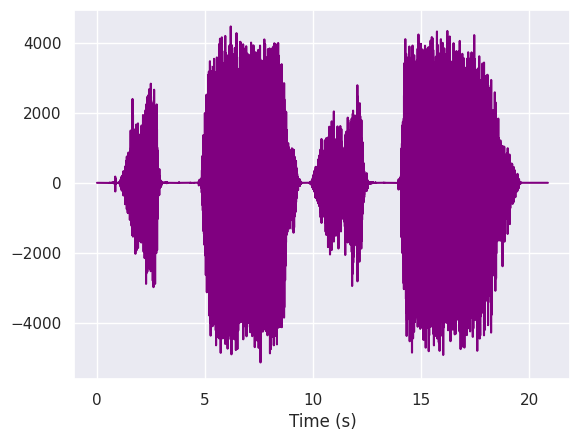

In [ ]:
#Plot the waveform
na = a.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

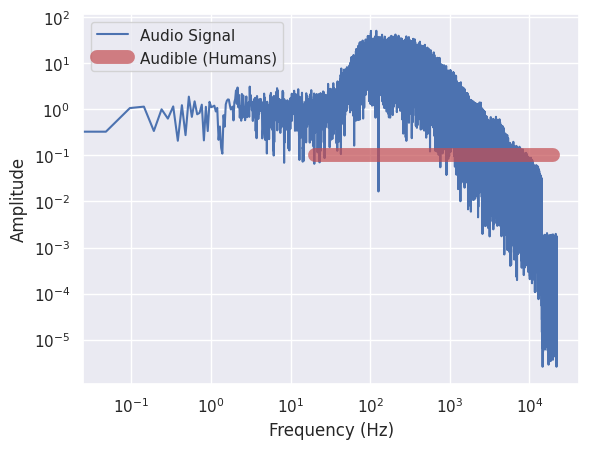

In [ ]:
#fft for entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

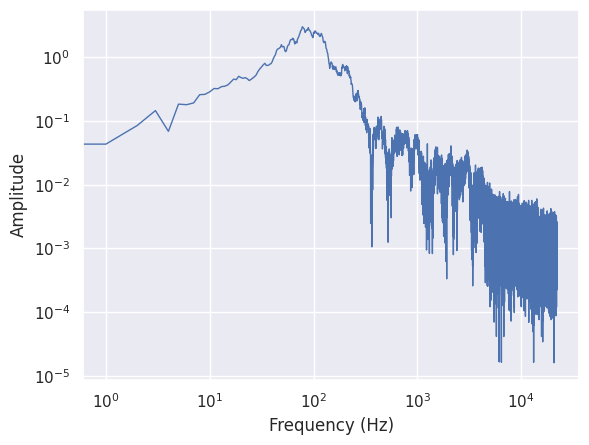

In [ ]:
#first second clip
na = s
a_k = np.fft.fft(a[:na])[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=1)
ax.set_xscale('log'); ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

<ipython-input-13-f388159e7768>:2: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


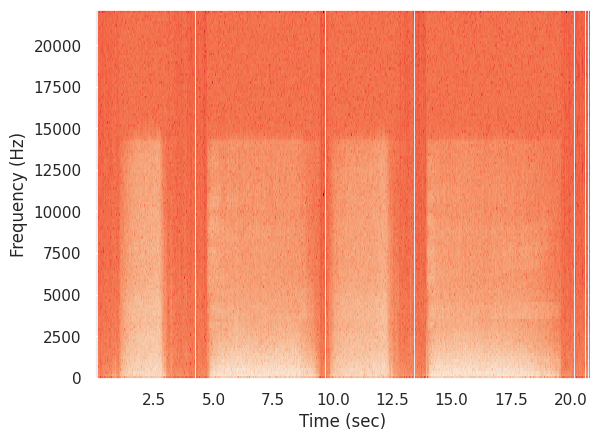

In [ ]:
fr, tm, spgram = signal.spectrogram(a,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

Almost all the time, the higher frequency components are dominant.

The color at each point in the spectrogram indicates the intensity or amplitude of the corresponding frequency at a specific point in time. Commonly, warmer colors (such as red or yellow) represent higher amplitudes, while cooler colors (such as blue) represent lower amplitudes.

Some crude ideas: Take the dataset that they have made publically available and run some model on your own data and find out whether your lung is healthy or not.

Read some theory about this thing too, maybe a more detailled read of the paper? Done.

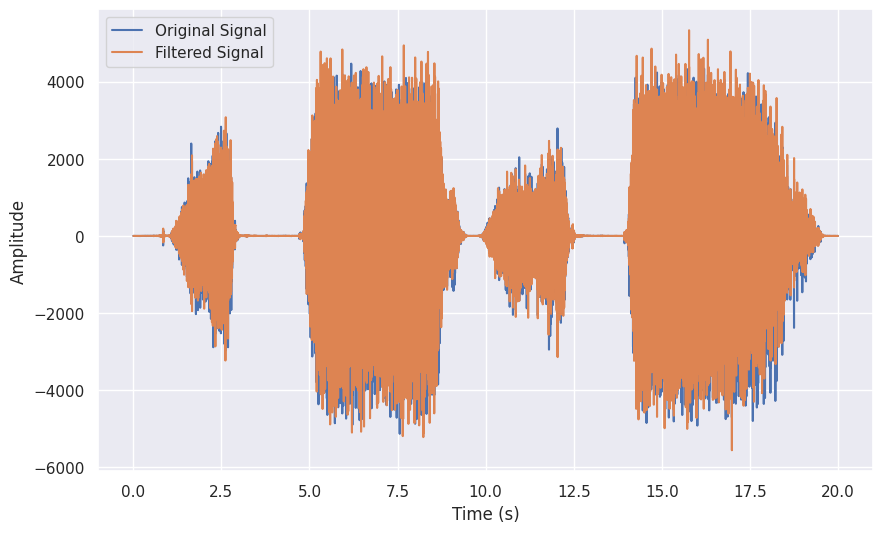

In [ ]:
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequency
fs = 44100  # Sample rate in Hz
cutoff_frequency = 50.0  # Cutoff frequency in Hz

# Generate a sample signal (for demonstration purposes)
t = np.linspace(0, 20, 20*int(fs), endpoint=False)  # 1 second of data
# signal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

signal = a[:20*fs]

# Apply high-pass filter
filtered_signal = butter_highpass_filter(signal, cutoff_frequency, fs, order=6)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


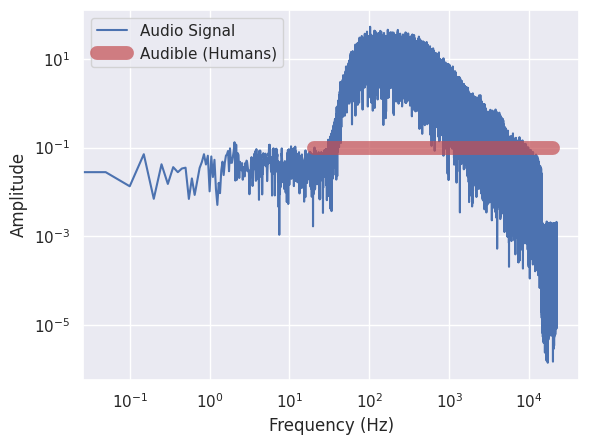

In [ ]:
#fft for entire audio clip
na = len(filtered_signal)
a_k = np.fft.fft(filtered_signal)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

<ipython-input-15-9e7f64567191>:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_filter = gaussian(length, std=cutoff)


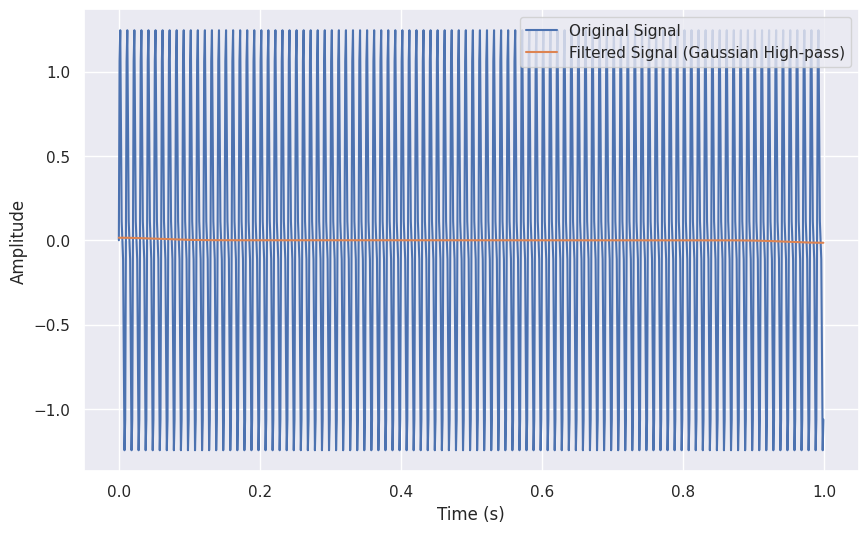

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian, convolve

def gaussian_highpass_filter(data, cutoff, fs):
    # Create a Gaussian filter kernel
    length = int(fs)
    t = np.linspace(-1, 1, length)
    gauss_filter = gaussian(length, std=cutoff)

    # Normalize the filter to have a sum of 1
    gauss_filter /= np.sum(gauss_filter)

    # Apply the filter to the data using convolution
    filtered_data = convolve(data, gauss_filter, mode='same')

    return filtered_data

# Sample rate and desired cutoff frequency
fs = 1000.0  # Sample rate in Hz
cutoff_frequency = 50.0  # Cutoff frequency in Hz

# Generate a sample signal (for demonstration purposes)
t = np.linspace(0, 1, int(fs), endpoint=False)  # 1 second of data
signal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

# Apply Gaussian high-pass filter
filtered_signal = gaussian_highpass_filter(signal, cutoff_frequency, fs)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal (Gaussian High-pass)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


References:
* For general understanding
    https://rishi-a.github.io/downloads/publications/spiromask.pdf

* For audio analysis code
    https://apmonitor.com/dde/index.php/Main/AudioAnalysis#:~:text=The%20first%20step%20is%20to,how%20to%20Install%20Python%20Packages.



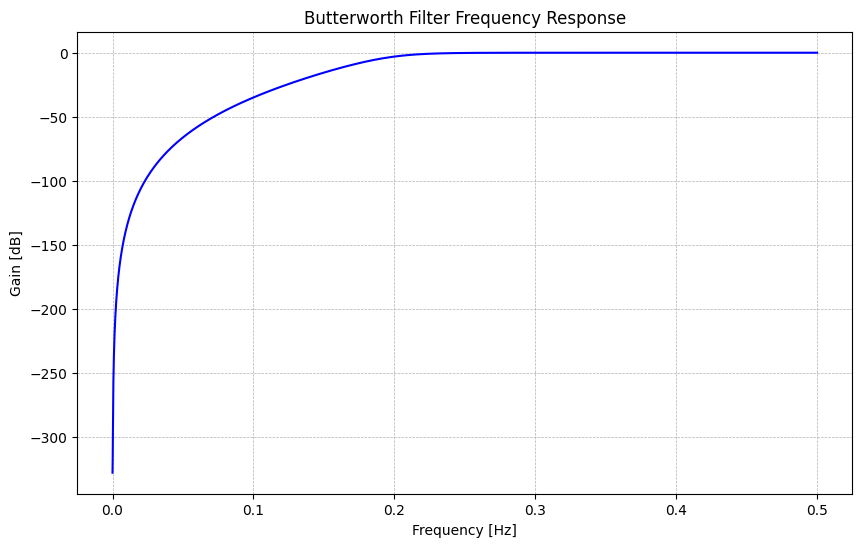

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Butterworth filter specifications
order = 5  # Order of the filter
cutoff_frequency = 0.4  # Cutoff frequency in normalized frequency (0.0 to 1.0)

# Create a Butterworth filter
b, a = signal.butter(order, cutoff_frequency, btype='high', analog=False, output='ba')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)

# Plot the frequency response
plt.figure(figsize=(10, 6))
plt.plot(0.5 * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Butterworth Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()
